In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('training.txt',sep="   ",  header = None)
X = df.drop(2, axis=1)
y = df.drop([0,1], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [202]:

def logistic(X):    #define Logistic function for convenience
  return 1/ (1+np.exp(-X))


class NN:  #make class: not necessary, just for convenience
  def __init__(self) :
    self.weights_first = np.random.rand(8,2)  #init for class. I defined random weights for two layers here, with rand function
    self.weights_second = np.random.rand(8)   #init for class. I defined random weights for two layers here, with rand function
    self.loss = []  #Defined empty loss list too, to make graph later
    pass
 
  #defining fit, including forward & backward propagation
  def fit(self, X_train,y_train,X_validation, y_validation, epoch= 100, learning_rate = 0.01):
    num = len(X_train)
    num_validaton = len(X_validation)
    
    for _ in range(epoch):   #make iteration as much as epoch
      ER=[]   #empty list to put loss per epoch in
      
      for k in range(num):  #because it is stochastic gradient descent, I implemented forward/backward propagation for every sample
        h=[]   #empty list to hidden output in
        for i in range(8):
          h.append(logistic(np.dot(X_train.iloc[k], self.weights_first[i])))  #calculate 8 h's by multiplication of X and old weights
                                                                              #and implement logistic
        y = logistic(np.dot(self.weights_second,h))   #calculate result y by logistic & multiplication
        ER.append((1/2)*(y-y_train.iloc[k])**2)  #calculate error. Because output layer is 1, it is calculated just by one sample

        #back propagation start
        EI = ((y-y_train.iloc[k])*y*(1-y)).values   # EI from ouput layer
        self.weights_second = self.weights_second -learning_rate * EI * h   #becuase formulas are calculated in lecture,
                                                                            #I used the formula to calculate backpropagation
        self.weights_first = self.weights_first-np.array(                                 
        [learning_rate*EI*self.weights_second*h*(np.ones(8)-h)*X_train.iloc[k][0],    #calculate using formula in class
         learning_rate*EI*self.weights_second*h*(np.ones(8)-h)*X_train.iloc[k][1]]).T
      self.loss.append(np.sum(ER)/num)   # put loss from every epoch. I used total mean 
    pass

  def graph(self):
    plt.plot(range(len(nn.loss)), nn.loss)  # simple graphing of loss by epochs
    plt.title('loss graph by epoch')

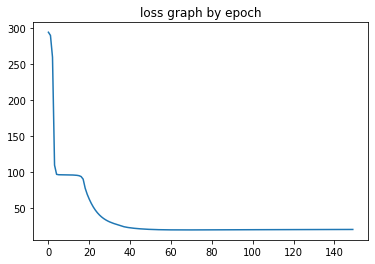

In [203]:
nn = NN()
nn.fit(X,y, epoch = 150)
nn.graph()

In [204]:
nn.loss

[294.35201443969027,
 289.9186671202942,
 259.6798228110988,
 109.66519610531041,
 96.88398987526499,
 96.32238798930955,
 96.2744191823192,
 96.24540657559106,
 96.21098693994821,
 96.16754953839816,
 96.11097744364699,
 96.03445337906568,
 95.9257762345292,
 95.76115764353412,
 95.48861014794397,
 94.97556797126296,
 93.81366322850332,
 90.1798421744165,
 77.5723450146721,
 69.07469963709312,
 62.31148426917822,
 56.41210553260237,
 51.34828808813991,
 47.039085711293865,
 43.39196334860213,
 40.314987980541446,
 37.72074979537203,
 35.52985498140146,
 33.67383876194247,
 32.09461113577993,
 30.742067728881672,
 29.57209086461857,
 28.54425761736766,
 27.61623704276836,
 26.72825251862929,
 25.78499715067335,
 24.82075439247008,
 24.046073673430875,
 23.454208210621474,
 22.973881884702152,
 22.56454408200947,
 22.207130837130883,
 21.89112637014552,
 21.609785324156878,
 21.358355120388033,
 21.133296537742204,
 20.93186629962382,
 20.75185515937973,
 20.591410130665828,
 20.4489124

In [205]:
nn.weights_first

array([[ 0.4770206 ,  0.96544655],
       [ 0.84558665,  0.3720941 ],
       [-0.94496248,  1.65409671],
       [ 0.47187954,  0.92188702],
       [ 0.49619919, -0.70905012],
       [ 0.73141416,  0.69387695],
       [ 0.61937626,  0.74624063],
       [ 0.25117582,  0.45760624]])

In [206]:
nn.weights_second

array([ 0.25650241, -0.33903975,  4.52098759, -0.584538  , -1.72412839,
       -0.14699096,  0.08627182, -0.33408919])